# National illness dataset analysis

This notebook analyzes the **National Illness dataset**, exploring its structure, performing preprocessing, and visualizing the time series data.  


## **1. Library imports**

In [6]:
import sys
import os
sys.path.append(os.path.abspath('../../'))

In [7]:
from data.utils import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## **2. Dataset overview**

### **Loading the dataset**

In [8]:
# Dataset names : exchange_rate.csv , electricity.csv , ETTm2.csv , national_illness.csv , traffic.csv , weather.csv
df = pd.read_csv("../../data/all_six_dataset/illness/national_illness.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               966 non-null    object 
 1   % WEIGHTED ILI     966 non-null    float64
 2   %UNWEIGHTED ILI    966 non-null    float64
 3   AGE 0-4            966 non-null    int64  
 4   AGE 5-24           966 non-null    int64  
 5   ILITOTAL           966 non-null    int64  
 6   NUM. OF PROVIDERS  966 non-null    int64  
 7   OT                 966 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 60.5+ KB



### **Column descriptions**

This dataset records trends in illnesses across a population.

| **Column name** | **Description**    |
|------------------|--------------------|
| `date`           | Timestamp         |
| `% WEIGHTED ILI`              | Weighted Influenza-Like illness percentage |
| `%UNWEIGHTED ILI`              | Unweighted Influenza-Like illness percentage|
| `AGE 0-4`              | Case count for ages 0–4  |
| `AGE 5-24`              | Case count for ages 5–24 |
| `ILITOTAL`              | Total cases of Influenza-Like illness    |
| `NUM. OF PROVIDERS`              | Number of reporting providers    |
| `OT`             | Additional metadata |


## **3. Preprocessing the data**

### **Convert and set date as index**

In [9]:
df = convert_date(df)
df.set_index('date', inplace=True)
df.columns

Index(['% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 5-24', 'ILITOTAL',
       'NUM. OF PROVIDERS', 'OT'],
      dtype='object')

**Frequency and summary:**
- Frequency: weekly
- Time series : 7 {'% WEIGHTED ILI', '%UNWEIGHTED ILI', 'AGE 0-4', 'AGE 5-24', 'ILITOTAL','NUM. OF PROVIDERS', 'OT'}
- Total observations: 6,762
- Test observations: 1,351
- Rolled forecast data points: 9.73 million
- Horizon: {24, 36, 48, 60}



## **4. Visualizing the Dataset**

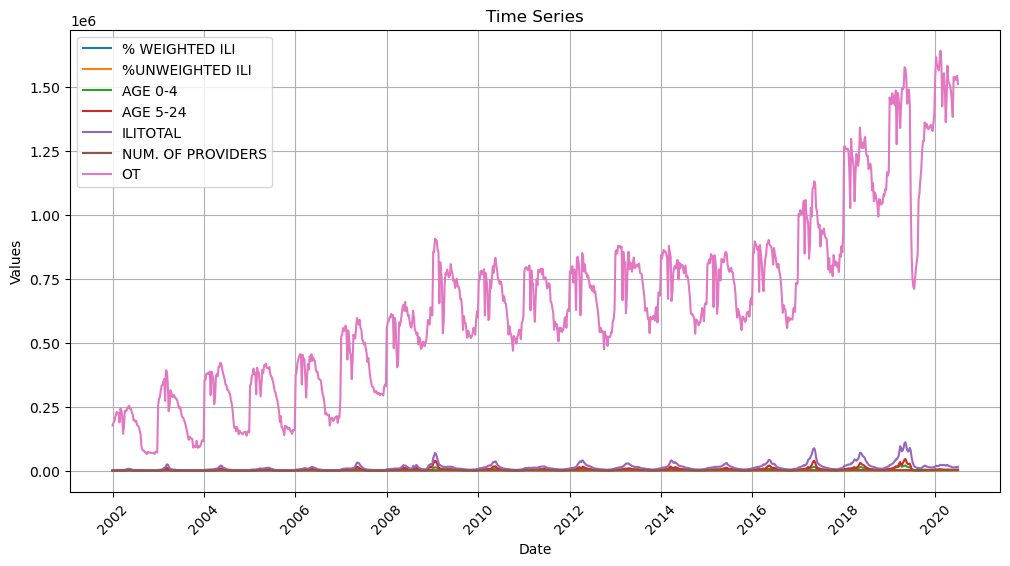

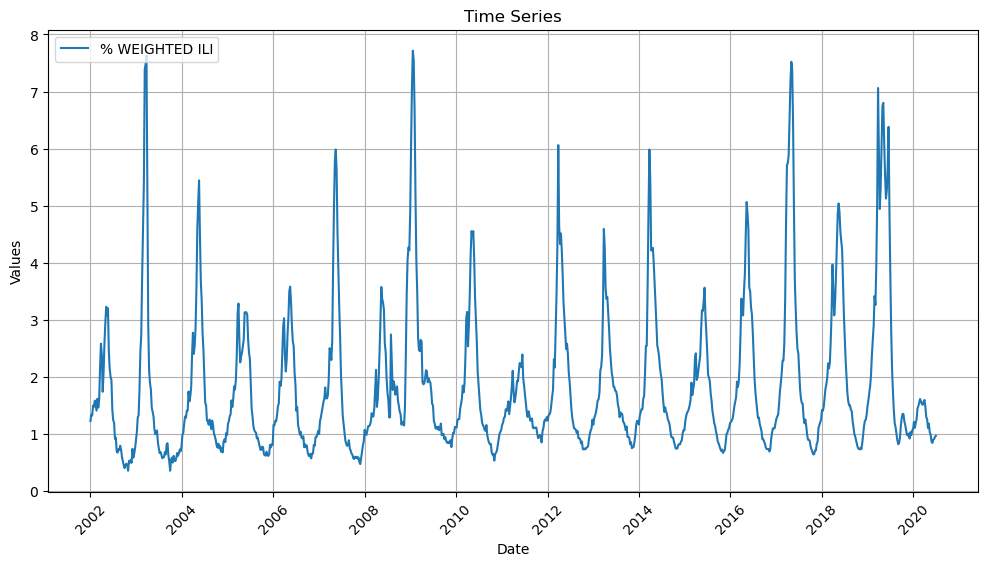

In [10]:
plot_time_series(df) # Plot all columns of the dataset
plot_time_series(df, column='% WEIGHTED ILI')  # Plot a specific column

## **5. Splitting the Dataset**

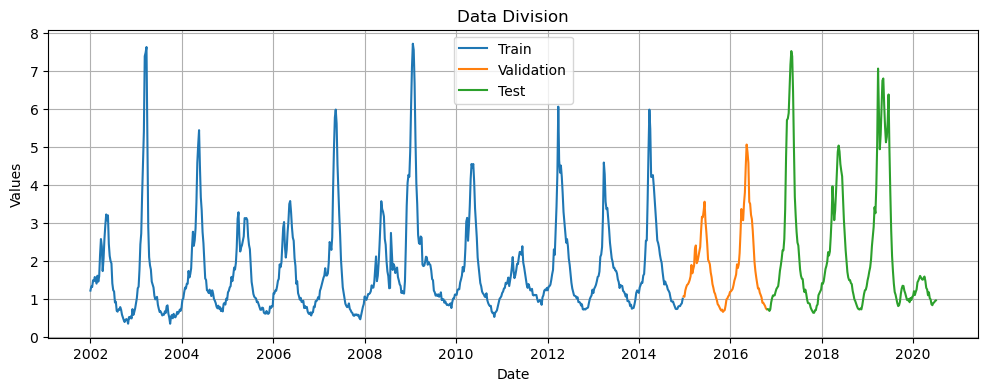

In [11]:
train, valid, test = split_data(df)
plot_data_split(train, valid, test, "% WEIGHTED ILI")